<br>
<font color='darkred', size="6">
    <center>
        <b> K-means Clustering </b>
    </center>
</font>
<br/>

y값 데이터를 모르는 상태에서 비슷한 애들끼리 묶어줌

supervised learning -> Classification Algorithm <br/>
unsupervised learning -> Clusering Algorithm

# Data Generation

centers
 [[-7.312715117751976, 6.9486747387446535], [5.275492379532281, -4.898619485211566], [-0.09129825816118142, -1.010178704225238], [3.031859454455258, 5.7744670227102635], [-8.122808264515303, -9.433050469559873]] 

Length of data: 500



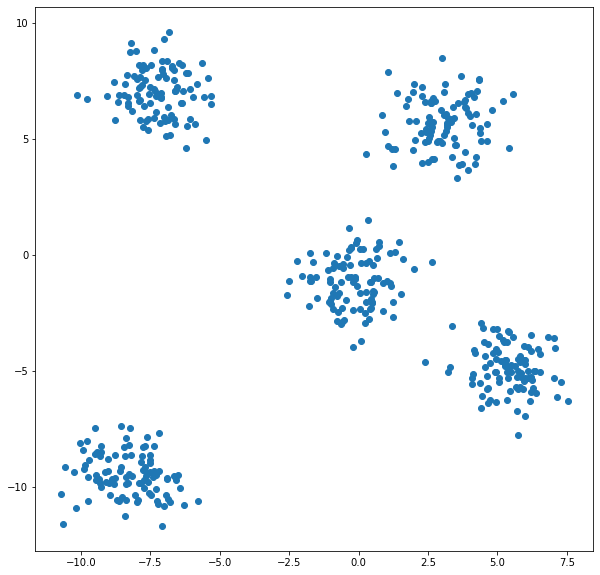

In [1]:
import random
import matplotlib.pyplot as plt

# set parameters
n_class, n_data = 5 , 100
random.seed(1)

# set the center
centers = list()
for _ in range(n_class):
    center = [random.uniform(-10,10), random.uniform(-10,10)]
    centers.append(center)
print("centers\n",centers,'\n')

# generate random x_data
x_data = list()

for class_idx in range(n_class):
    center = centers[class_idx]
    
    class_x_data = list()
    for _ in range(n_data):
        x1 = center[0] + random.gauss(0,1)
        x2 = center[1] + random.gauss(0,1)
        class_x_data.append([x1,x2])
    x_data += class_x_data

print("Length of data: {}\n".format(len(x_data)))

# visualization
fig, ax = plt.subplots(figsize=(10,10))
x1_data = [x_data[i][0] for i in range(n_data*n_class)]
x2_data = [x_data[i][1] for i in range(n_data*n_class)]

ax.scatter(x1_data, x2_data)

# Random Choice of Centroids

[68, 291, 433, 410, 391]


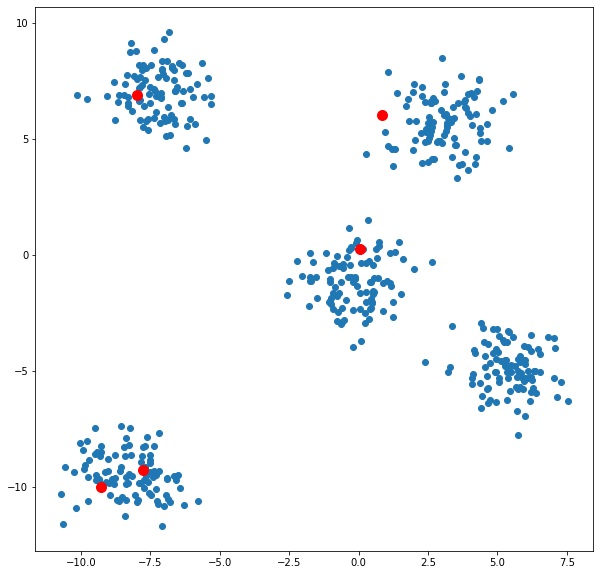

In [2]:
random.seed(1)

K = 5

random_indices = list()
centroids = list()

for _ in range(10000):
    random_idx = random.randint(0, n_data*n_class - 1)
    
    if random_idx not in random_indices:
        random_indices.append(random_idx)
        centroids.append(x_data[random_idx])
        
    if len(random_indices) == K:
        print(random_indices)
        break

if len(random_indices) != K:
    print("[ERROR] Not enough inital centroids")
    
# visualization
fig, ax = plt.subplots(figsize=(10,10))
x1_data = [x_data[i][0] for i in range(n_data*n_class)]
x2_data = [x_data[i][1] for i in range(n_data*n_class)]
ax.scatter(x1_data, x2_data)

for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], color='r', s=100)

# Clustering

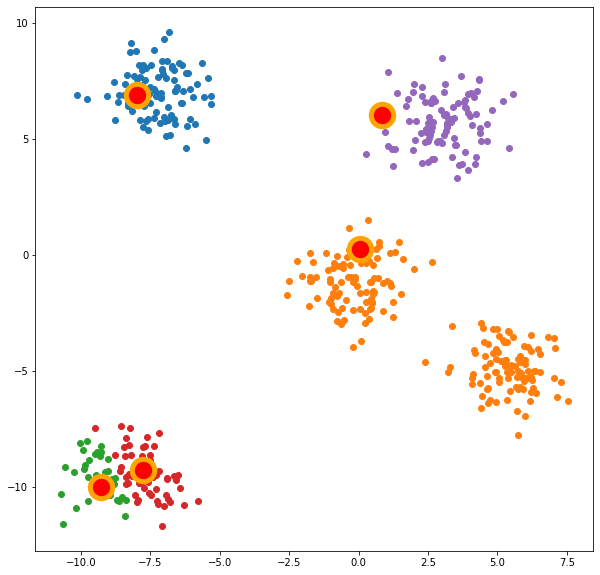

In [4]:
clusters = [[] for _ in range(K)]

for X in x_data:
    
    distances = list()
    for centroid in centroids:
        distance = ((centroid[0] - X[0])**2 + (centroid[1] - X[1])**2)**0.5
        distances.append(distance)
        
        
    m, m_idx = distances[0], 0
    for dist_idx, dist in enumerate(distances):
        if dist<m:
            m = dist
            m_idx = dist_idx
    clusters[m_idx].append(X)

# visualization
fig, ax = plt.subplots(figsize=(10,10))

# data
for cluster in clusters:
    x1_data = [cluster[i][0] for i in range(len(cluster))]
    x2_data = [cluster[i][1] for i in range(len(cluster))]
    ax.scatter(x1_data,x2_data)

# centroid
for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], color='r', s=500, edgecolor='orange', linewidth=5)

# Centroid Update 

In [7]:
centroids = [[0,0] for _ in range(K)]

for cluster_idx, cluster in enumerate(clusters):
    for X in cluster:
        centroids[cluster_idx][0] += X[0]
        centroids[cluster_idx][1] += X[1]

for cluster_idx, cluster in enumerate(clusters):
    centroids[cluster_idx][0] /= len(cluster)
    centroids[cluster_idx][1] /= len(cluster)



[[-7.237891089066306, 7.03569766229597], [2.6206060348044122, -3.0107256483487164], [-9.405049018227137, -9.566350717536372], [-7.616065327623945, -9.4066784396097], [3.0362292994356865, 5.708565400078516]]


# K-means Clustering

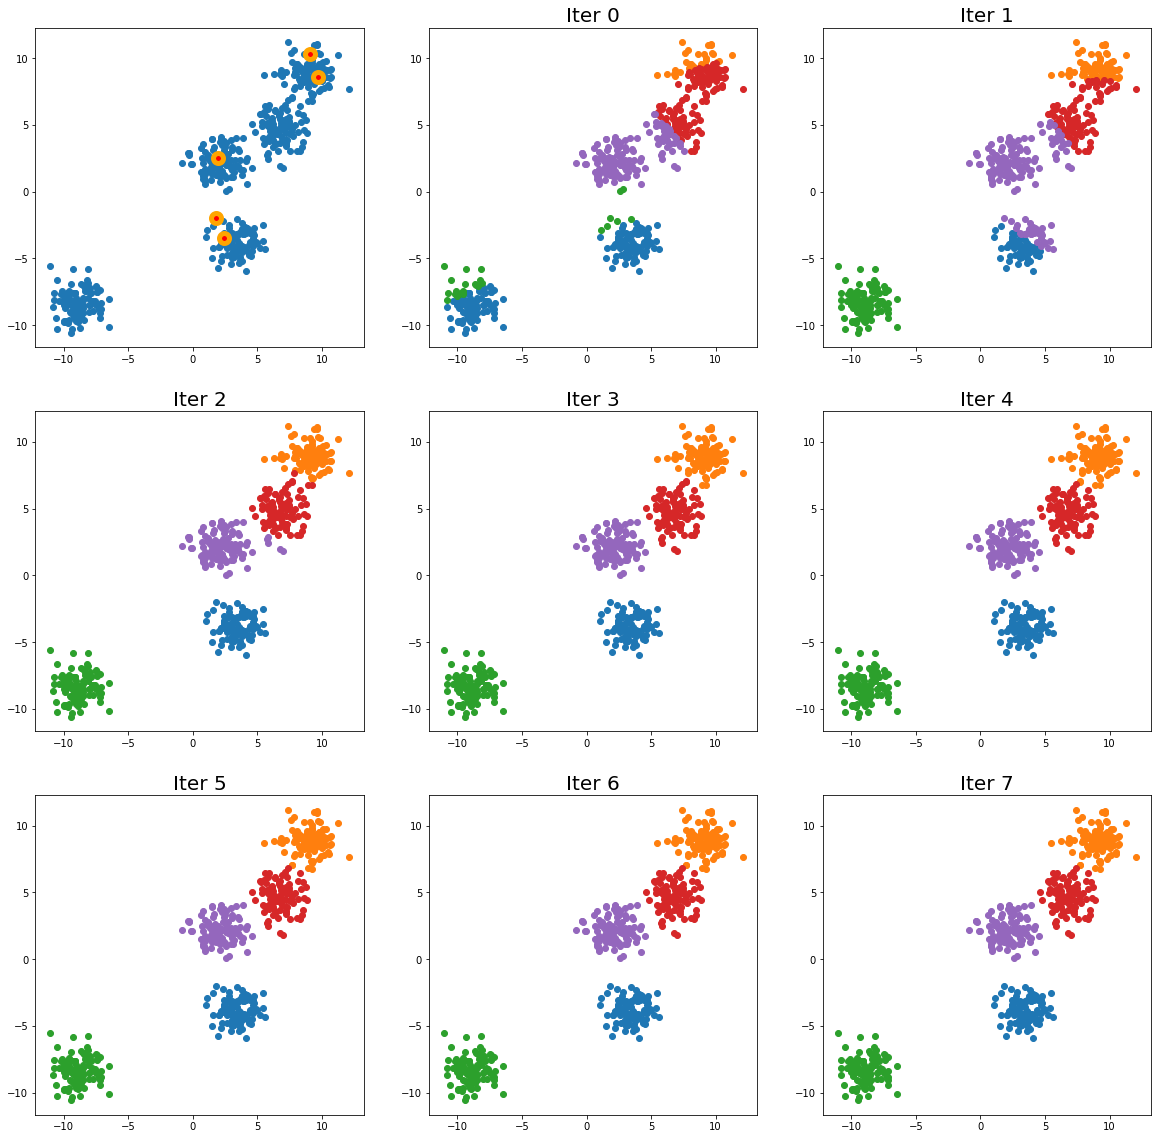

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(2)

# fig setting
fig = plt.figure(figsize=(20, 20))
axes = np.empty(shape=(0, 0))
for row_idx in range(3):
    for col_idx in range(3):
        axes = np.append(axes, fig.add_subplot(3, 3, row_idx*3 + col_idx + 1))
        
# set toy dataset's parameters
K = 5
n_iter = 8
n_class, n_data = 5, 100

##### generate a toy dataset(start) #####
centers = list()
for _ in range(K):
    center = [random.uniform(-10,10), random.uniform(-10,10)]
    centers.append(center)

x_data = list()
for center in centers:
    class_x_data = list()
    
    for _ in range(n_data):
        x1_data = center[0] + random.gauss(0,1) 
        x2_data = center[1] + random.gauss(0,1) 
        class_x_data.append([x1_data, x2_data])
    x_data += class_x_data

##### generate a toy dataset(end) #####

# draw the dataset
x1_data = [x_data[i][0] for i in range(n_data*n_class)]
x2_data = [x_data[i][1] for i in range(n_data*n_class)]
axes[0].scatter(x1_data, x2_data)

##### random choice of the initial centroids(start) #####
random_indices = list()
for i in range(10000):    
    idx = random.randint(0, n_class*n_data - 1)
    
    if idx not in random_indices:
        random_indices.append(idx)
    
    if len(random_indices) == K:
        break
    
if len(random_indices) != K:
    print("[ERROR]:not enough data")

centroids = list()
for idx in random_indices:
    x1 = x_data[idx][0]
    x2 = x_data[idx][1]
    centroids.append([x1,x2])
##### random choice of the initial centroids(end) #####
for centroid in centroids:
    axes[0].scatter(centroid[0], centroid[1], color='r', s=100, edgecolor='orange', linewidth=5)

# clustering for n_iter times
for iter in range(n_iter):
    ##### clustering(start) #####
    clusters = [[] for _ in range(K)]

    for X in x_data:
        distances = list()
        for centroid in centroids:
            distance = ((X[0] - centroid[0])**2 + (X[1] - centroid[1])**2)**0.5
            distances.append(distance)

        m, m_idx = distances[0], 0
        for dist_idx, dist in enumerate(distances):
            if dist<m:
                m = dist
                m_idx = dist_idx
        clusters[m_idx].append(X)
    ##### clustering(end) #####

    for cluster in clusters:
        x1_data = [X[0] for X in cluster]
        x2_data = [X[1] for X in cluster]
        axes[iter+1].scatter(x1_data, x2_data)
        axes[iter+1].set_title("Iter " + str(iter), fontsize = 20)

    ##### update centroids(start) #####
    centroids = [[0,0] for _ in range(K)]

    for cluster_idx , cluster in enumerate(clusters):
        for X in cluster:
            centroids[cluster_idx][0] += X[0]
            centroids[cluster_idx][1] += X[1]

    for cluster_idx , cluster in enumerate(clusters):    
        centroids[cluster_idx][0] /= len(cluster)
        centroids[cluster_idx][1] /= len(cluster)
    ##### update centroids(end) #####    
        